In [1]:
import pandas as pd
import numpy as np
import os
os.chdir('D:\Documents')

In [2]:
Bills=pd.read_excel('Assignment-1_Data.xlsx')

In [3]:
Bills.head(3)

,BillNo,Itemname,Quantity,Date,Price,CustomerID,Country
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom


In [4]:
Bills.shape

(522064, 7)

In [5]:
Bills[Bills.duplicated()]

,BillNo,Itemname,Quantity,Date,Price,CustomerID,Country
508,536409,UNION JACK FLAG LUGGAGE TAG,1,2010-12-01 11:45:00,1.25,17908.0,United Kingdom
518,536409,HAND WARMER SCOTTY DOG DESIGN,1,2010-12-01 11:45:00,2.10,17908.0,United Kingdom
528,536409,SET 2 TEA TOWELS I LOVE LONDON,1,2010-12-01 11:45:00,2.95,17908.0,United Kingdom
530,536409,SCOTTIE DOG HOT WATER BOTTLE,1,2010-12-01 11:45:00,4.95,17908.0,United Kingdom
546,536412,ROUND SNACK BOXES SET OF 4 SKULLS,1,2010-12-01 11:49:00,2.95,17920.0,United Kingdom
...,...,...,...,...,...,...,...
521833,581538,BLACK PIRATE TREASURE CHEST,1,2011-12-09 11:34:00,0.39,14446.0,United Kingdom
521847,581538,BOX OF 6 MINI VINTAGE CRACKERS,1,2011-12-09 11:34:00,2.49,14446.0,United Kingdom
521850,581538,REVOLVER WOODEN RULER,1,2011-12-09 11:34:00,1.95,14446.0,United Kingdom
521857,581538,WICKER STAR,1,2011-12-09 11:34:00,2.10,14446.0,United Kingdom


In [6]:
# Correct way to drop duplicated rows
Bills = Bills.drop_duplicates()

# Alternative approach using the original drop method
# Bills = Bills.drop(Bills[Bills.duplicated()].index)

In [7]:
Bills.shape

(516778, 7)

In [8]:
Bills.isnull().sum()

BillNo             0
Itemname        1455
Quantity           0
Date               0
Price              0
CustomerID    133967
Country            0
dtype: int64

In [9]:
Bill = Bills.dropna(subset=['Itemname'])
Bill.head()


,BillNo,Itemname,Quantity,Date,Price,CustomerID,Country
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [10]:
Bill.shape

(515323, 7)

In [11]:
Bill.isnull().sum()

BillNo             0
Itemname           0
Quantity           0
Date               0
Price              0
CustomerID    132512
Country            0
dtype: int64

In [12]:
#we have to identify association between the items
basket=pd.crosstab(Bill.BillNo,Bill.Itemname)

In [13]:
basket_sets = basket.applymap(lambda x: 1 if x > 0 else 0)

C:\Users\Admin\AppData\Local\Temp\ipykernel_3044\1328208419.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  basket_sets = basket.applymap(lambda x: 1 if x > 0 else 0)


In [65]:
#groc[groc.duplicated(['product_id','job'], keep=False)]

In [14]:
from mlxtend.frequent_patterns import apriori, association_rules

In [21]:
frequent_item_sets=apriori(basket_sets, min_support=.02, use_colnames=True)

C:\Users\Admin\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [18]:
frequent_item_sets

,support,itemsets
0,0.050821,(ALARM CLOCK BAKELIKE RED)
1,0.070814,(ASSORTED COLOUR BIRD ORNAMENT)
2,0.058442,(HEART OF WICKER SMALL)
3,0.055226,(JAM MAKING SET PRINTED)
4,0.053890,(JAM MAKING SET WITH JARS)
5,0.059927,(JUMBO BAG PINK POLKADOT)
6,0.102138,(JUMBO BAG RED RETROSPOT)
7,0.057700,(JUMBO SHOPPER VINTAGE RED PAISLEY)
8,0.058294,(JUMBO STORAGE BAG SUKI)
9,0.062352,(LUNCH BAG BLACK SKULL.)


In [27]:
rules = association_rules(frequent_item_sets, metric="lift", min_threshold=1.0)
rules.sort_values(by="lift", ascending=False, inplace=True)
rules.head(10)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
154,"(ROSES REGENCY TEACUP AND SAUCER, GREEN REGENC...",(PINK REGENCY TEACUP AND SAUCER),0.036174,0.036421,0.025485,0.704514,19.343514,1.0,0.024167,3.261000,0.983894,0.540966,0.693346,0.702121
155,(PINK REGENCY TEACUP AND SAUCER),"(ROSES REGENCY TEACUP AND SAUCER, GREEN REGENC...",0.036421,0.036174,0.025485,0.699728,19.343514,1.0,0.024167,3.209847,0.984147,0.540966,0.688459,0.702121
152,"(PINK REGENCY TEACUP AND SAUCER, ROSES REGENCY...",(GREEN REGENCY TEACUP AND SAUCER),0.028207,0.048248,0.025485,0.903509,18.726262,1.0,0.024124,9.863609,0.974074,0.500000,0.898617,0.715857
157,(GREEN REGENCY TEACUP AND SAUCER),"(PINK REGENCY TEACUP AND SAUCER, ROSES REGENCY...",0.048248,0.028207,0.025485,0.528205,18.726262,1.0,0.024124,2.059779,0.994586,0.500000,0.514511,0.715857
25,(GREEN REGENCY TEACUP AND SAUCER),(PINK REGENCY TEACUP AND SAUCER),0.048248,0.036421,0.029939,0.620513,17.037124,1.0,0.028181,2.539160,0.989023,0.547016,0.606169,0.721262
24,(PINK REGENCY TEACUP AND SAUCER),(GREEN REGENCY TEACUP AND SAUCER),0.036421,0.048248,0.029939,0.822011,17.037124,1.0,0.028181,5.347247,0.976884,0.547016,0.812988,0.721262
156,(ROSES REGENCY TEACUP AND SAUCER),"(PINK REGENCY TEACUP AND SAUCER, GREEN REGENCY...",0.050129,0.029939,0.025485,0.508391,16.981097,1.0,0.023984,1.973237,0.990777,0.466908,0.493219,0.679815
153,"(PINK REGENCY TEACUP AND SAUCER, GREEN REGENCY...",(ROSES REGENCY TEACUP AND SAUCER),0.029939,0.050129,0.025485,0.851240,16.981097,1.0,0.023984,6.385246,0.970156,0.466908,0.843389,0.679815
23,(GARDENERS KNEELING PAD CUP OF TEA),(GARDENERS KNEELING PAD KEEP CALM),0.037312,0.044784,0.026920,0.721485,16.110251,1.0,0.025249,3.429679,0.974280,0.487892,0.708428,0.661295
22,(GARDENERS KNEELING PAD KEEP CALM),(GARDENERS KNEELING PAD CUP OF TEA),0.044784,0.037312,0.026920,0.601105,16.110251,1.0,0.025249,2.413387,0.981901,0.487892,0.585645,0.661295


In [28]:
rules[(rules['lift'] > 1) & (rules['confidence'] > 0.5)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
154,"(ROSES REGENCY TEACUP AND SAUCER, GREEN REGENC...",(PINK REGENCY TEACUP AND SAUCER),0.036174,0.036421,0.025485,0.704514,19.343514,1.0,0.024167,3.261000,0.983894,0.540966,0.693346,0.702121
155,(PINK REGENCY TEACUP AND SAUCER),"(ROSES REGENCY TEACUP AND SAUCER, GREEN REGENC...",0.036421,0.036174,0.025485,0.699728,19.343514,1.0,0.024167,3.209847,0.984147,0.540966,0.688459,0.702121
152,"(PINK REGENCY TEACUP AND SAUCER, ROSES REGENCY...",(GREEN REGENCY TEACUP AND SAUCER),0.028207,0.048248,0.025485,0.903509,18.726262,1.0,0.024124,9.863609,0.974074,0.500000,0.898617,0.715857
157,(GREEN REGENCY TEACUP AND SAUCER),"(PINK REGENCY TEACUP AND SAUCER, ROSES REGENCY...",0.048248,0.028207,0.025485,0.528205,18.726262,1.0,0.024124,2.059779,0.994586,0.500000,0.514511,0.715857
25,(GREEN REGENCY TEACUP AND SAUCER),(PINK REGENCY TEACUP AND SAUCER),0.048248,0.036421,0.029939,0.620513,17.037124,1.0,0.028181,2.539160,0.989023,0.547016,0.606169,0.721262
24,(PINK REGENCY TEACUP AND SAUCER),(GREEN REGENCY TEACUP AND SAUCER),0.036421,0.048248,0.029939,0.822011,17.037124,1.0,0.028181,5.347247,0.976884,0.547016,0.812988,0.721262
156,(ROSES REGENCY TEACUP AND SAUCER),"(PINK REGENCY TEACUP AND SAUCER, GREEN REGENCY...",0.050129,0.029939,0.025485,0.508391,16.981097,1.0,0.023984,1.973237,0.990777,0.466908,0.493219,0.679815
153,"(PINK REGENCY TEACUP AND SAUCER, GREEN REGENCY...",(ROSES REGENCY TEACUP AND SAUCER),0.029939,0.050129,0.025485,0.851240,16.981097,1.0,0.023984,6.385246,0.970156,0.466908,0.843389,0.679815
23,(GARDENERS KNEELING PAD CUP OF TEA),(GARDENERS KNEELING PAD KEEP CALM),0.037312,0.044784,0.026920,0.721485,16.110251,1.0,0.025249,3.429679,0.974280,0.487892,0.708428,0.661295
22,(GARDENERS KNEELING PAD KEEP CALM),(GARDENERS KNEELING PAD CUP OF TEA),0.044784,0.037312,0.026920,0.601105,16.110251,1.0,0.025249,2.413387,0.981901,0.487892,0.585645,0.661295


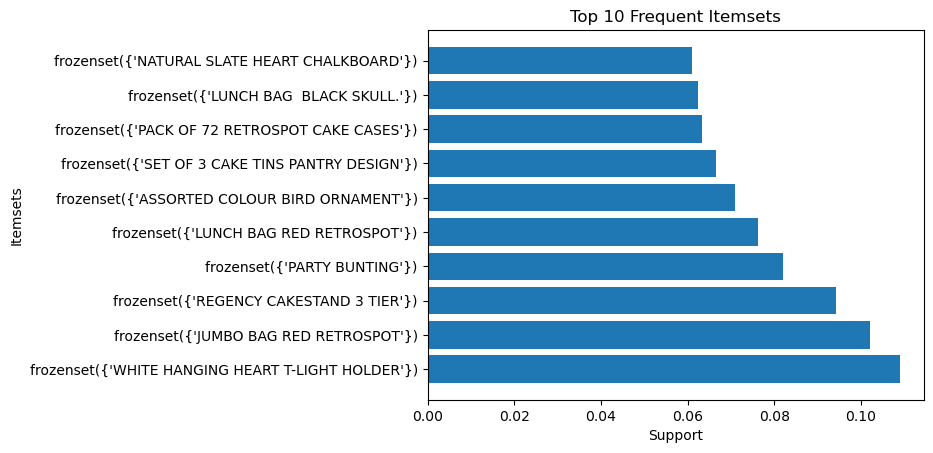

In [29]:
import matplotlib.pyplot as plt

top_items = frequent_item_sets.sort_values(by='support', ascending=False).head(10)
plt.barh(top_items['itemsets'].astype(str), top_items['support'])
plt.xlabel('Support')
plt.ylabel('Itemsets')
plt.title('Top 10 Frequent Itemsets')
plt.show()


In [30]:
print("Basket shape:", basket.shape)
print("Sparsity:", 1 - (basket.sum().sum() / (basket.shape[0] * basket.shape[1])))


Basket shape: (20208, 4185)
Sparsity: 0.9939065853711603


In [31]:
rules['antecedents'] = rules['antecedents'].apply(lambda x: ', '.join(list(x)))
rules['consequents'] = rules['consequents'].apply(lambda x: ', '.join(list(x)))


In [32]:
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
154,"ROSES REGENCY TEACUP AND SAUCER, GREEN REGENCY...",PINK REGENCY TEACUP AND SAUCER,0.036174,0.036421,0.025485,0.704514,19.343514,1.0,0.024167,3.261000,0.983894,0.540966,0.693346,0.702121
155,PINK REGENCY TEACUP AND SAUCER,"ROSES REGENCY TEACUP AND SAUCER, GREEN REGENCY...",0.036421,0.036174,0.025485,0.699728,19.343514,1.0,0.024167,3.209847,0.984147,0.540966,0.688459,0.702121
152,"PINK REGENCY TEACUP AND SAUCER, ROSES REGENCY ...",GREEN REGENCY TEACUP AND SAUCER,0.028207,0.048248,0.025485,0.903509,18.726262,1.0,0.024124,9.863609,0.974074,0.500000,0.898617,0.715857
157,GREEN REGENCY TEACUP AND SAUCER,"PINK REGENCY TEACUP AND SAUCER, ROSES REGENCY ...",0.048248,0.028207,0.025485,0.528205,18.726262,1.0,0.024124,2.059779,0.994586,0.500000,0.514511,0.715857
25,GREEN REGENCY TEACUP AND SAUCER,PINK REGENCY TEACUP AND SAUCER,0.048248,0.036421,0.029939,0.620513,17.037124,1.0,0.028181,2.539160,0.989023,0.547016,0.606169,0.721262
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148,WOODEN PICTURE FRAME WHITE FINISH,WHITE HANGING HEART T-LIGHT HOLDER,0.054038,0.108967,0.020042,0.370879,3.403599,1.0,0.014153,1.416315,0.746535,0.140187,0.293942,0.277401
131,WHITE HANGING HEART T-LIGHT HOLDER,NATURAL SLATE HEART CHALKBOARD,0.108967,0.060966,0.020338,0.186649,3.061520,1.0,0.013695,1.154524,0.755712,0.135958,0.133842,0.260126
130,NATURAL SLATE HEART CHALKBOARD,WHITE HANGING HEART T-LIGHT HOLDER,0.060966,0.108967,0.020338,0.333604,3.061520,1.0,0.013695,1.337093,0.717083,0.135958,0.252109,0.260126
81,WHITE HANGING HEART T-LIGHT HOLDER,JUMBO BAG RED RETROSPOT,0.108967,0.102138,0.021873,0.200727,1.965254,1.0,0.010743,1.123348,0.551225,0.115586,0.109804,0.207437
